# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collecting

In [2]:
%pwd

'C:\\Users\\Admin\\desktop\\Python\\ML_files\\03-My_Jobs'

In [3]:
df = pd.read_csv('C:\\Users\\Admin\\Desktop\\Python\\ML_files\\Portfolio\\Titanic_Survivors_Prediction\\Used_Data\\Titanic.csv')

In [4]:
pd.set_option("Display.max_columns", None) # This is for Jupyter can show all info if columns more than 10 
pd.set_option("Display.max_rows", None) # This is for Jupyter can show all info if rows more than 10 

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

### Checking for duplicates

In [6]:
df.duplicated().sum()

0

### Checking for missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df = df.drop(["PassengerId", "Cabin", "Name"], axis=1)  # If predictor's missing values are more then 50%, it is desirable to delete it.

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [11]:
df["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [12]:
df["Ticket"].nunique()   # The count of the unique elements is too much, this predictor is irrelevant

681

In [13]:
df = df.drop("Ticket", axis=1)

In [14]:
df["Age"].value_counts().sort_index()

Age
0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      7
2.00     10
3.00      6
4.00     10
5.00      4
6.00      3
7.00      3
8.00      4
9.00      8
10.00     2
11.00     4
12.00     1
13.00     2
14.00     6
14.50     1
15.00     5
16.00    17
17.00    13
18.00    26
19.00    25
20.00    15
20.50     1
21.00    24
22.00    27
23.00    15
23.50     1
24.00    30
24.50     1
25.00    23
26.00    18
27.00    18
28.00    25
28.50     2
29.00    20
30.00    25
30.50     2
31.00    17
32.00    18
32.50     2
33.00    15
34.00    15
34.50     1
35.00    18
36.00    22
36.50     1
37.00     6
38.00    11
39.00    14
40.00    13
40.50     2
41.00     6
42.00    13
43.00     5
44.00     9
45.00    12
45.50     2
46.00     3
47.00     9
48.00     9
49.00     6
50.00    10
51.00     7
52.00     6
53.00     1
54.00     8
55.00     2
55.50     1
56.00     4
57.00     2
58.00     5
59.00     2
60.00     4
61.00     3
62.00     4
63.00     2
64.00     2
65.00     3
66.00     1


<Axes: >

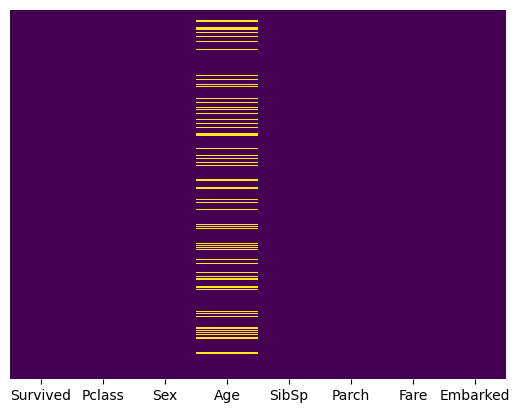

In [15]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")  # Yellow sides are missing values

<Axes: xlabel='Pclass', ylabel='Age'>

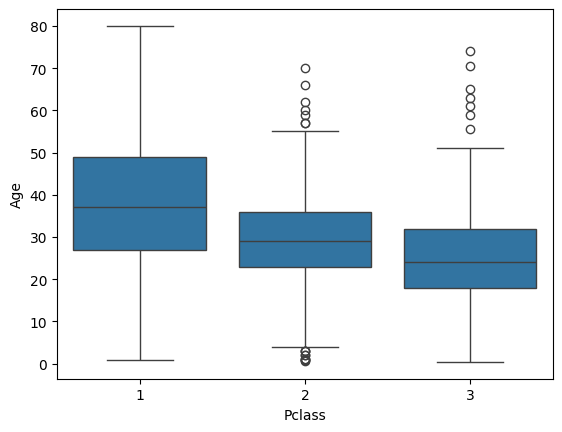

In [16]:
# Now let's see the mean Age by Pclass

sns.boxplot(data=df, x="Pclass", y="Age")

In [17]:
# let's fill the missing values of Age according to the following logic: If missing Age has Pclass number 1, I will fill it
#                                                                        with median of the ages in Pclass number 1. Same I will do
#                                                                        with other missing ages with corresponding Pclass.


for i, j in zip(df["Pclass"], df["Age"]):
    if pd.isnull(j):
        if i == 1:
            df["Age"].fillna(df[df["Pclass"]==1]["Age"].median(), inplace=True)
        elif i == 2:
            df["Age"].fillna(df[df["Pclass"]==2]["Age"].median(), inplace=True)
        else:
            df["Age"].fillna(df[df["Pclass"]==3]["Age"].median(), inplace=True)
                

In [18]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [19]:
# Now lets handle missing values of "Embarked". 
# They are just two, but I dont want to delete them.

In [20]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [21]:
df["Embarked"].isnull().sum() / df.shape[0] * 100

0.22446689113355783

In [22]:
# Such as 'Embarked' is a categorical predictor, we can't use any Imputer model on it, so lets fill them with
# most frequency value.

df["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [23]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [24]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [25]:
# Now let's turn into numeric our categorical predictors so we can see correlation for all predictors.

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for i in df:
    if df[i].dtype == object:
        df[i] = label.fit_transform(df[i])


In [26]:
# Now let's see correlation
df.corr()["Survived"]

Survived    1.000000
Pclass     -0.338481
Sex        -0.543351
Age        -0.052872
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Embarked   -0.167675
Name: Survived, dtype: float64

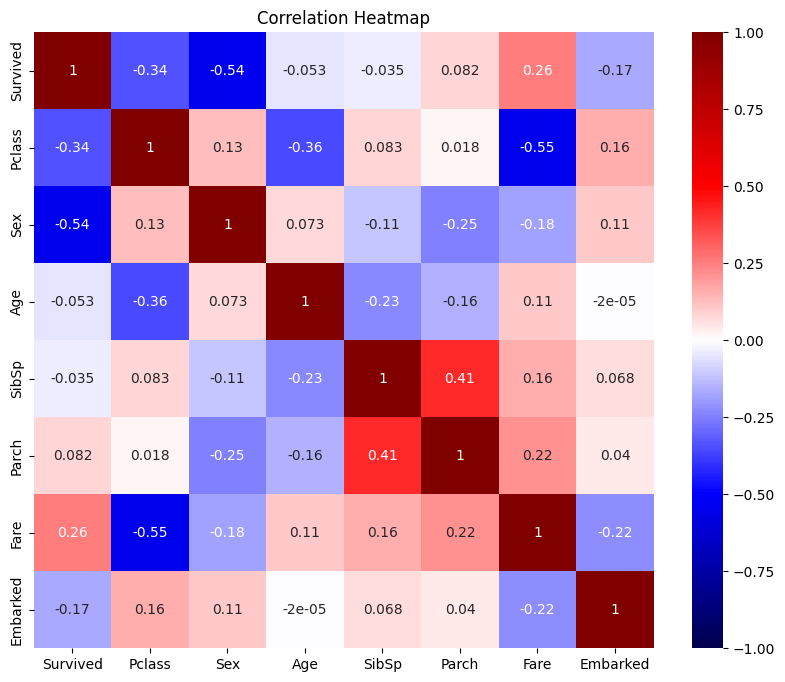

In [27]:
# Let's see visualisation of heat correlation 
plt.figure(figsize=(10, 8)) 
sns.heatmap(df.corr(), annot=True, cmap='seismic', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Checking for Outliers

In [28]:
# Lets create a function wich will show us diagnostic of data with three ways.
def vis_outliers(df, col):
    plt.figure(figsize=(14,20))
    plt.title(col)

    # Histogram
    plt.subplot(3,1,1)     # tree rows and one column place, where histogram is the first visualisation
    plt.hist(df[col])
    # Boxplot
    plt.subplot(3,1,2)     # tree rows and one column place, where boxplot is the second visualisation
    sns.boxplot(x = df[col])
    # Lets see data values as points
    plt.subplot(3,1,3)
    sns.scatterplot(df[col])

    

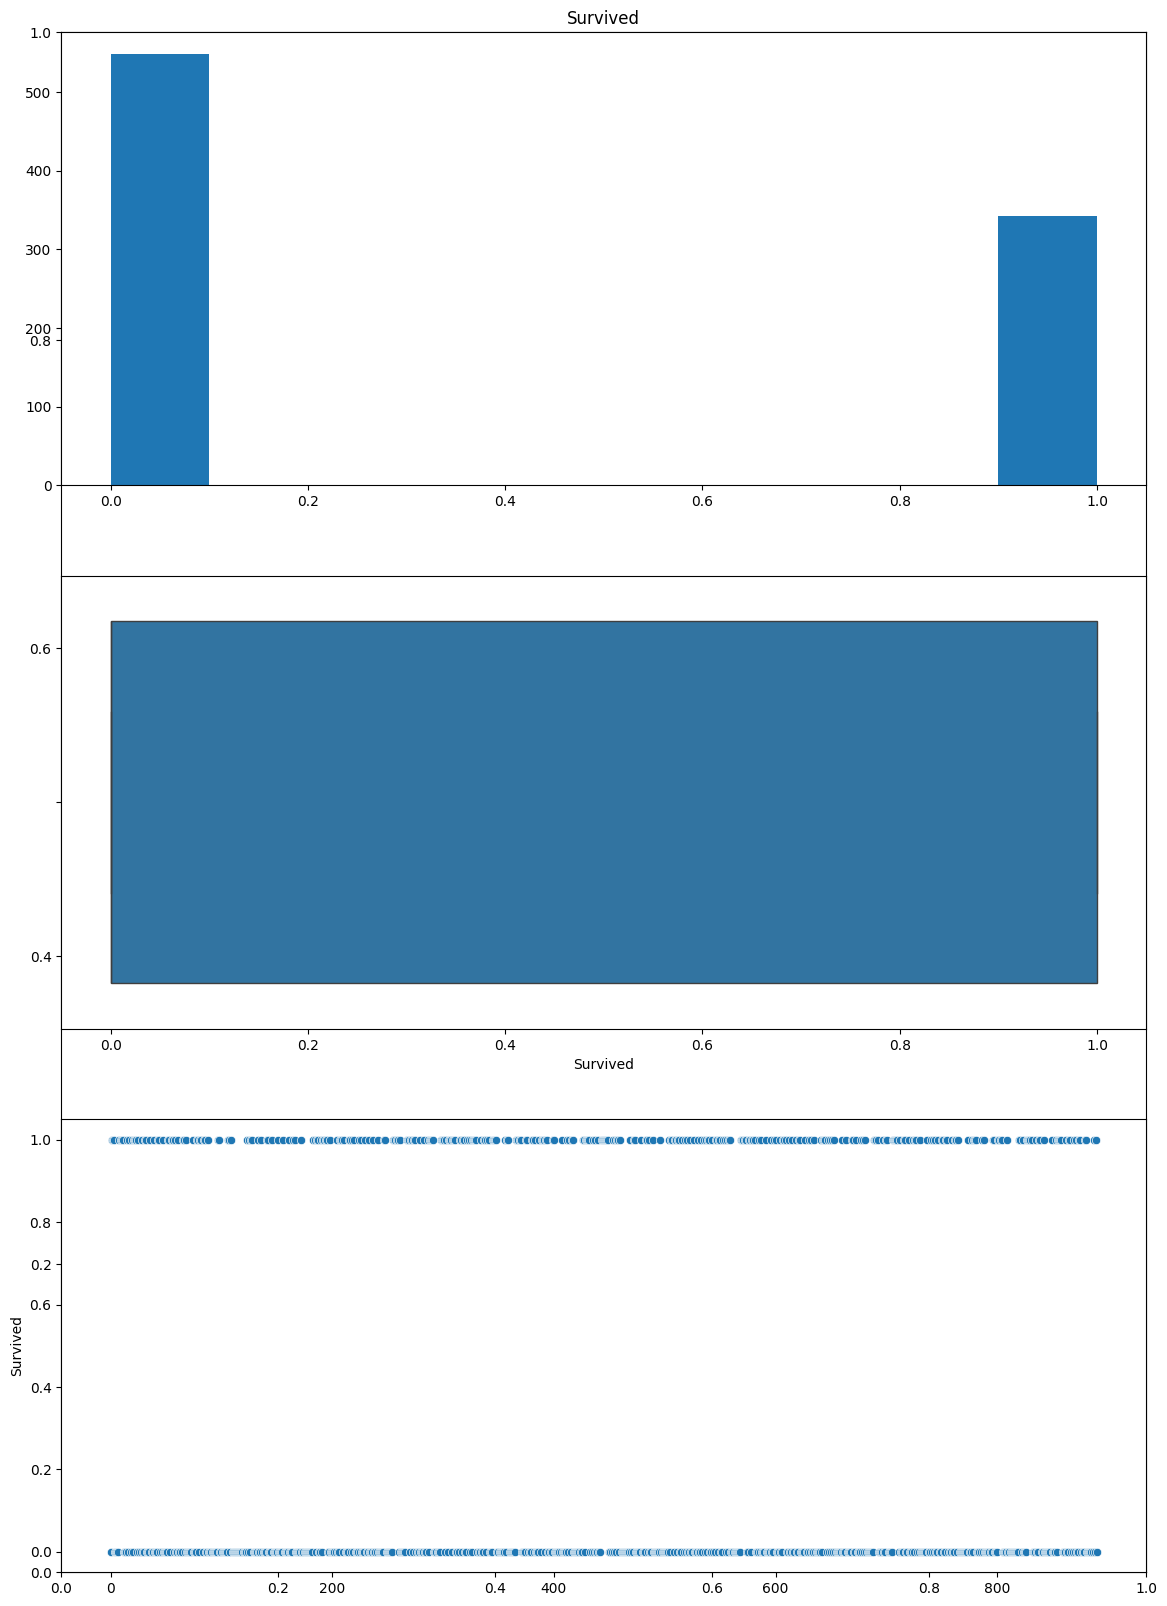

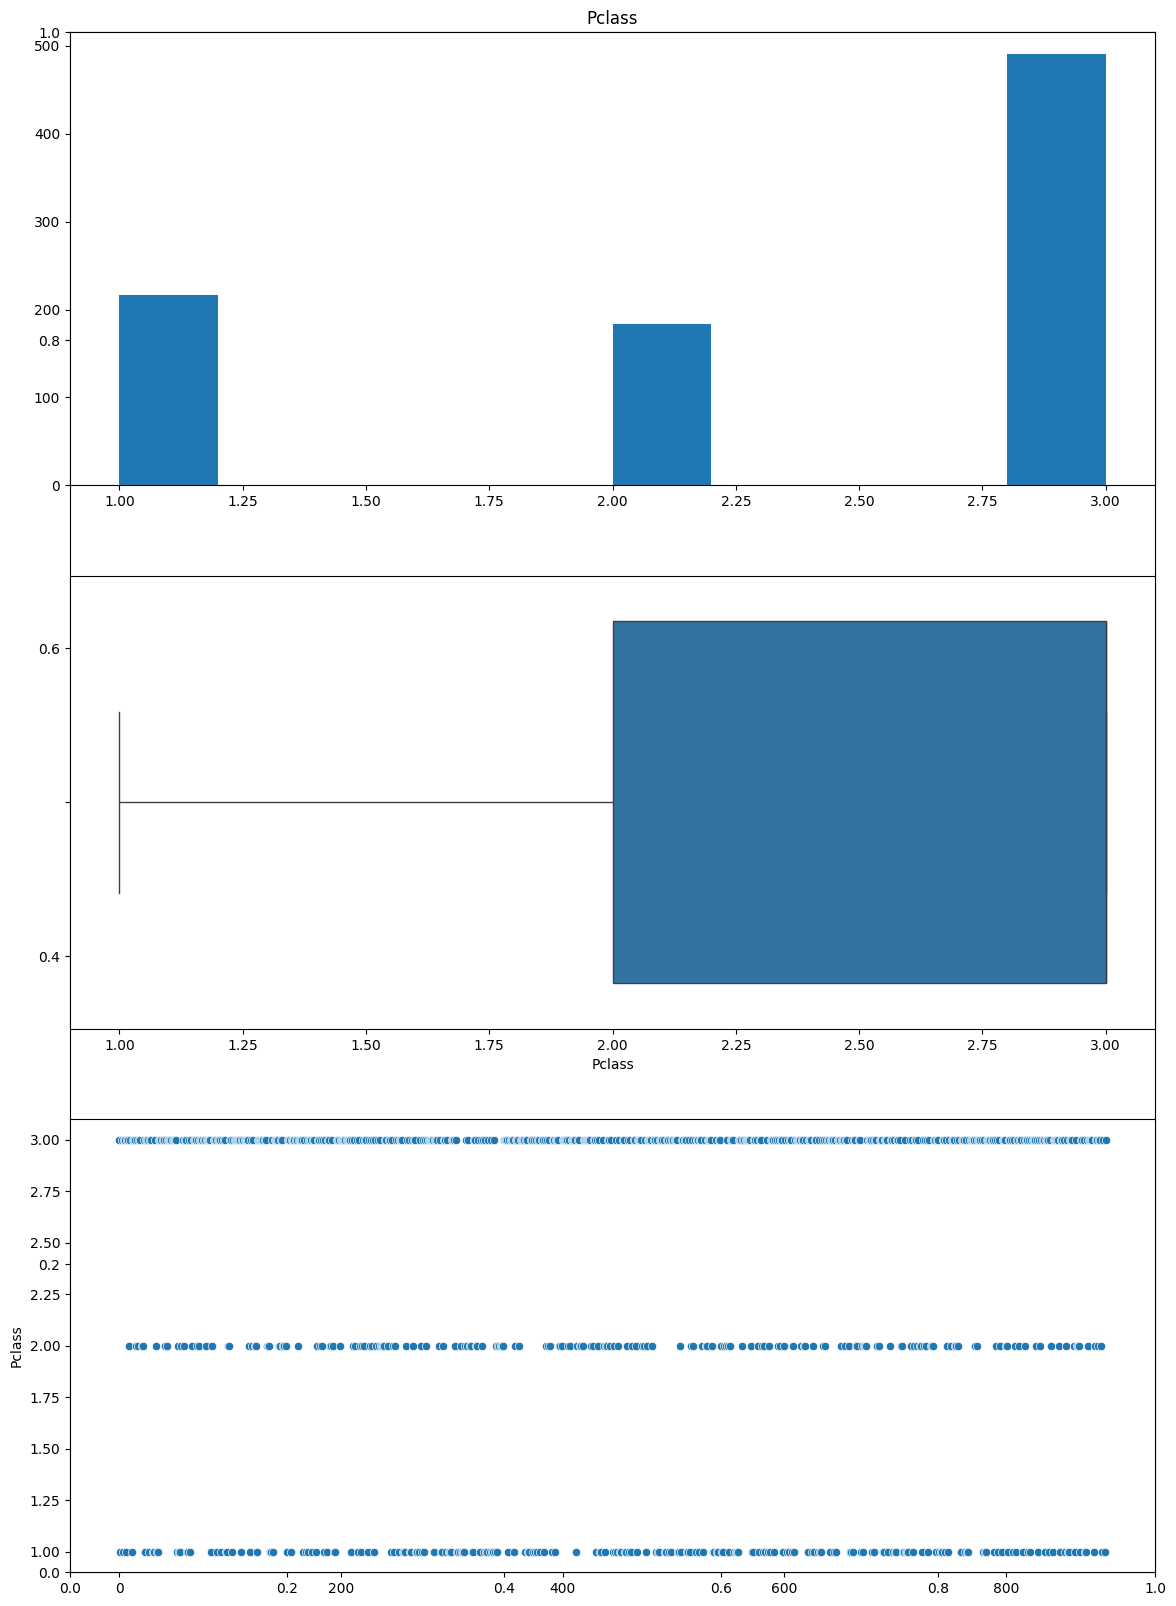

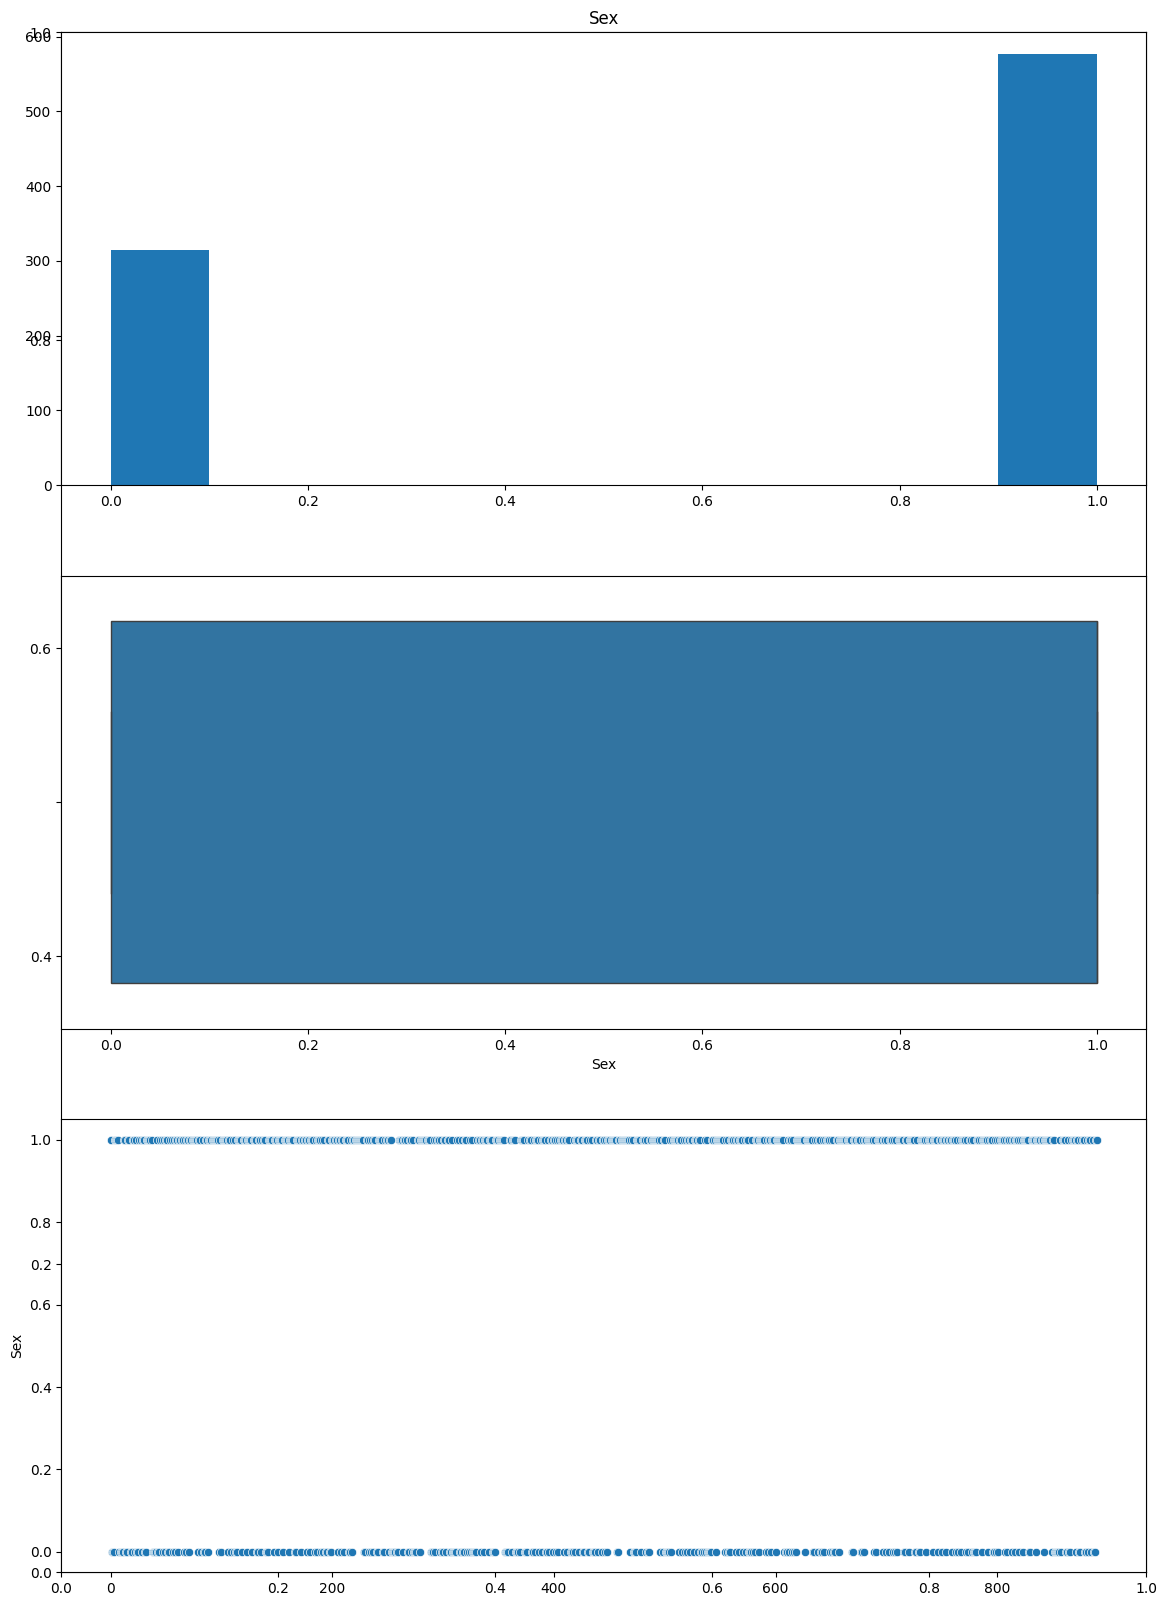

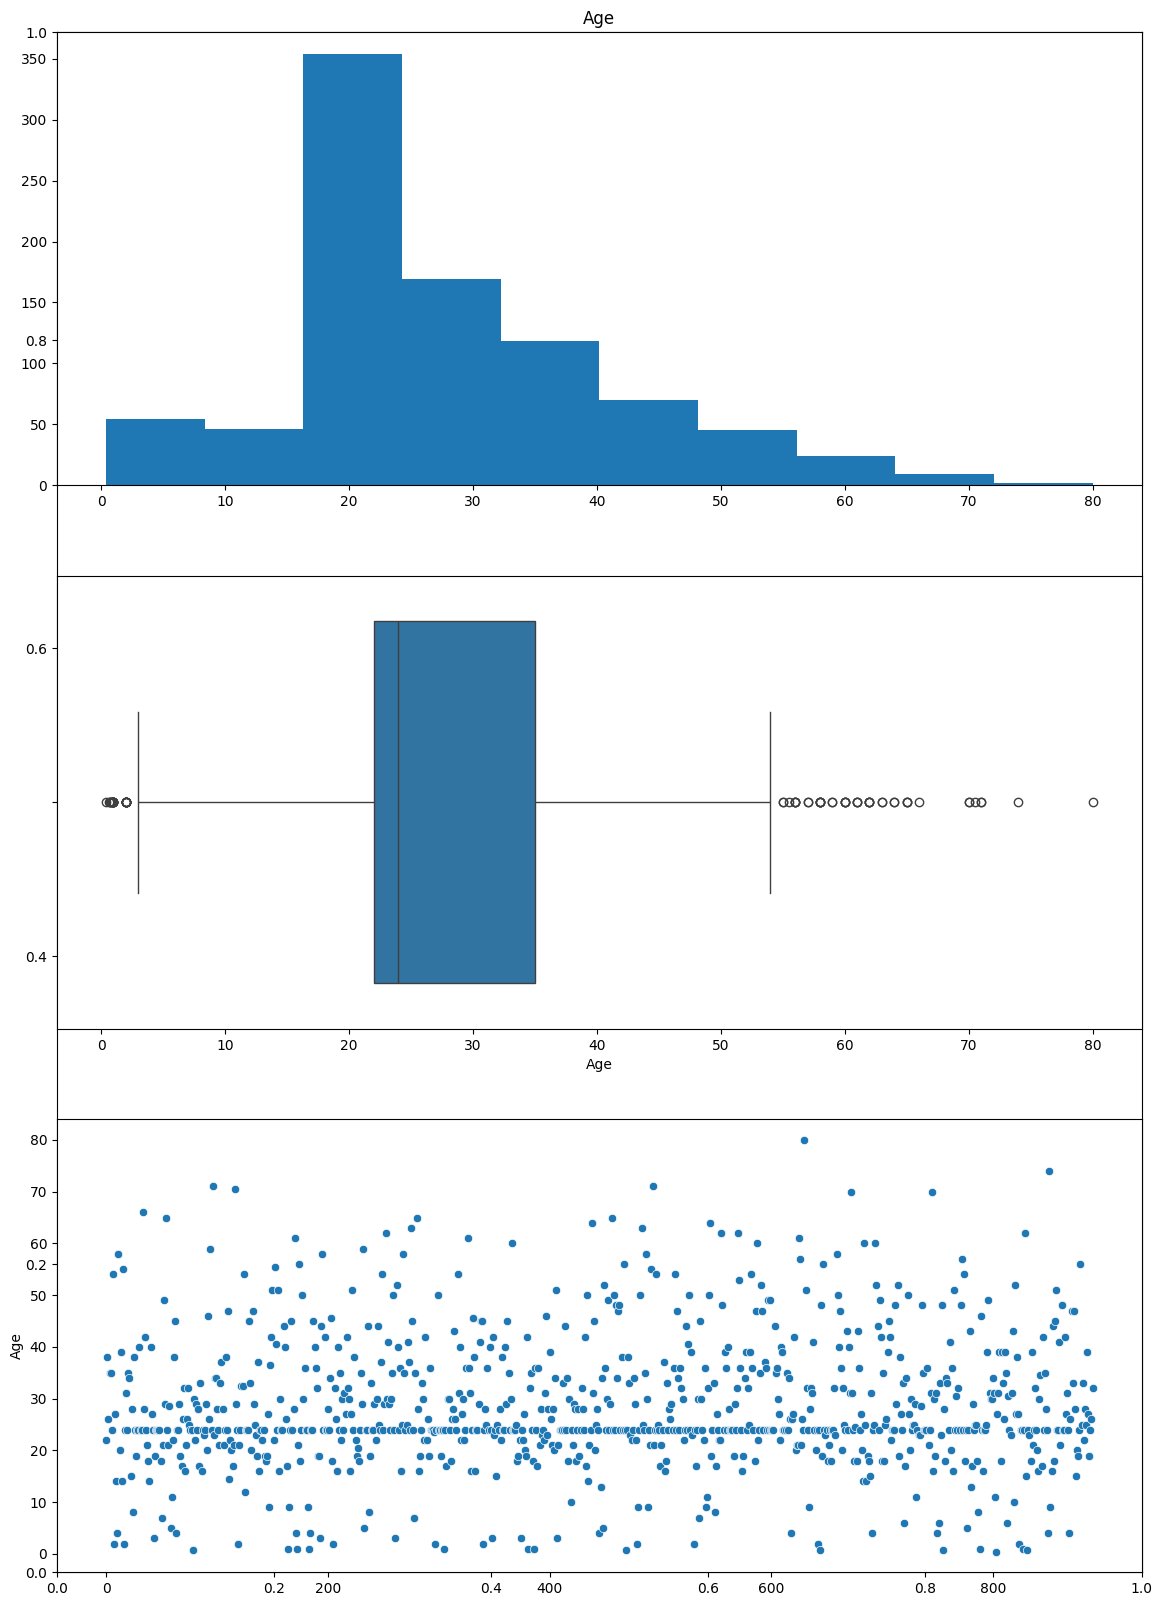

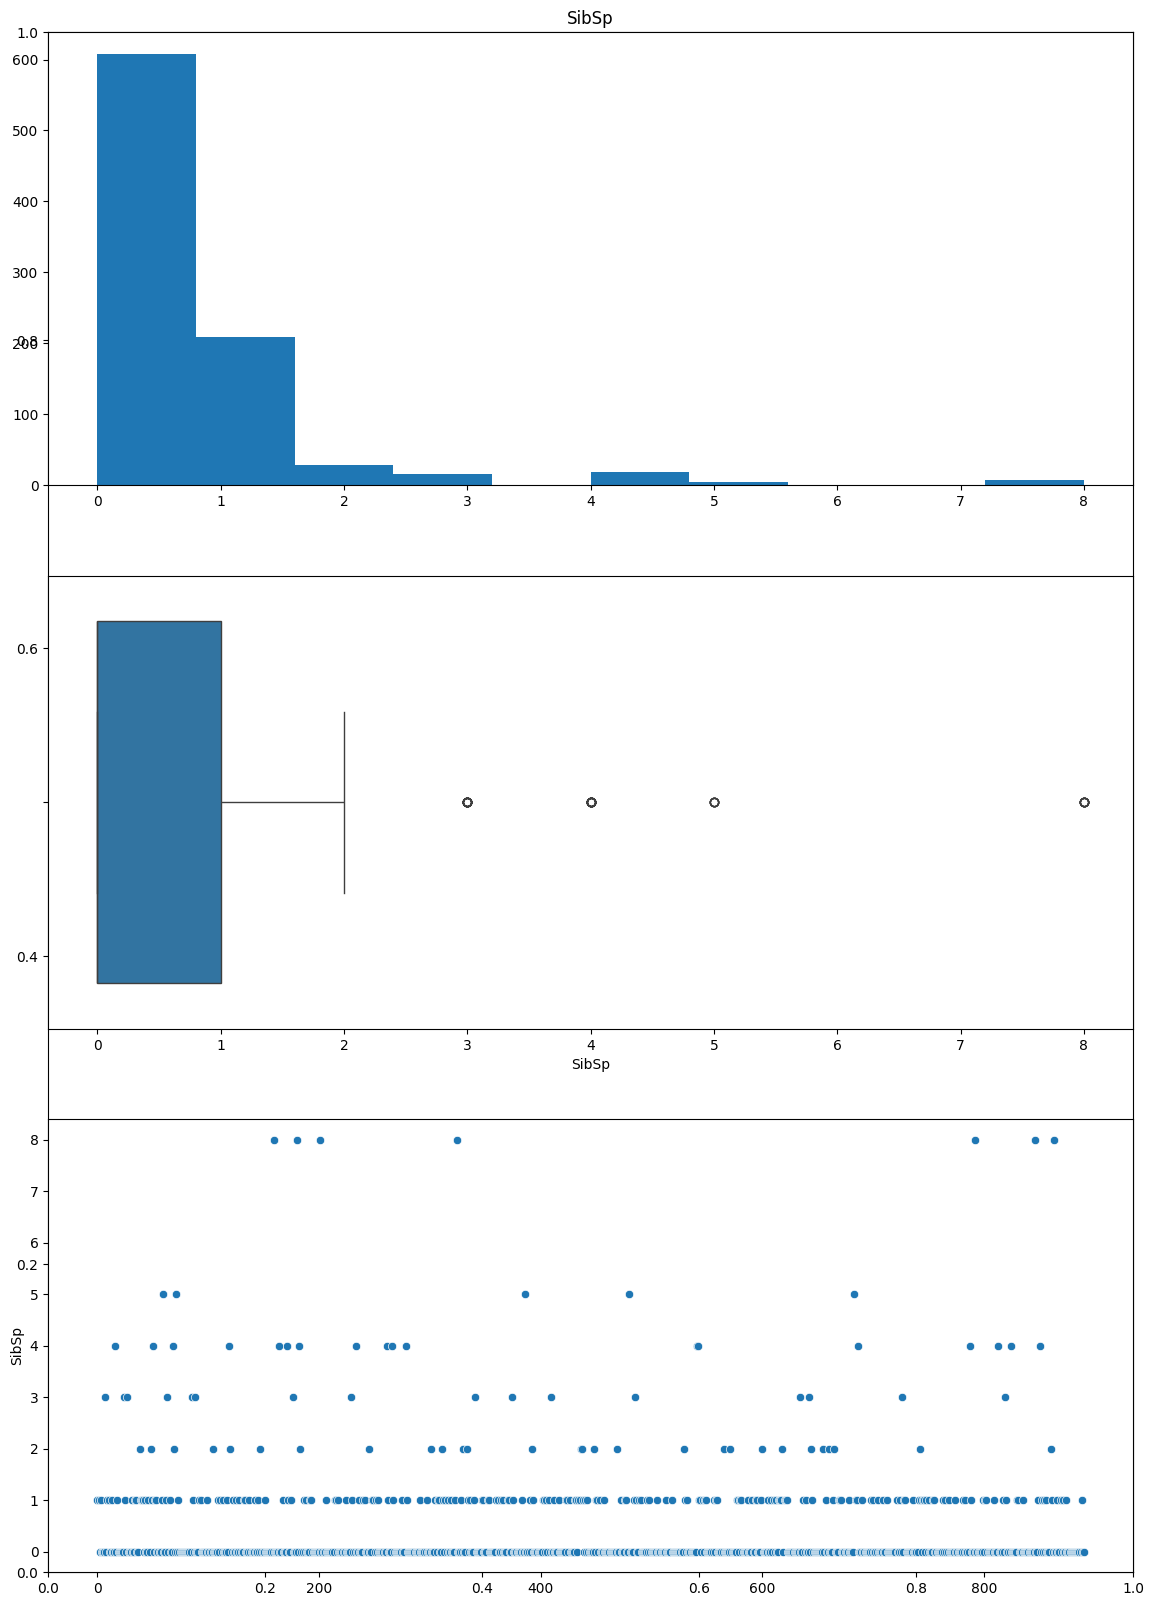

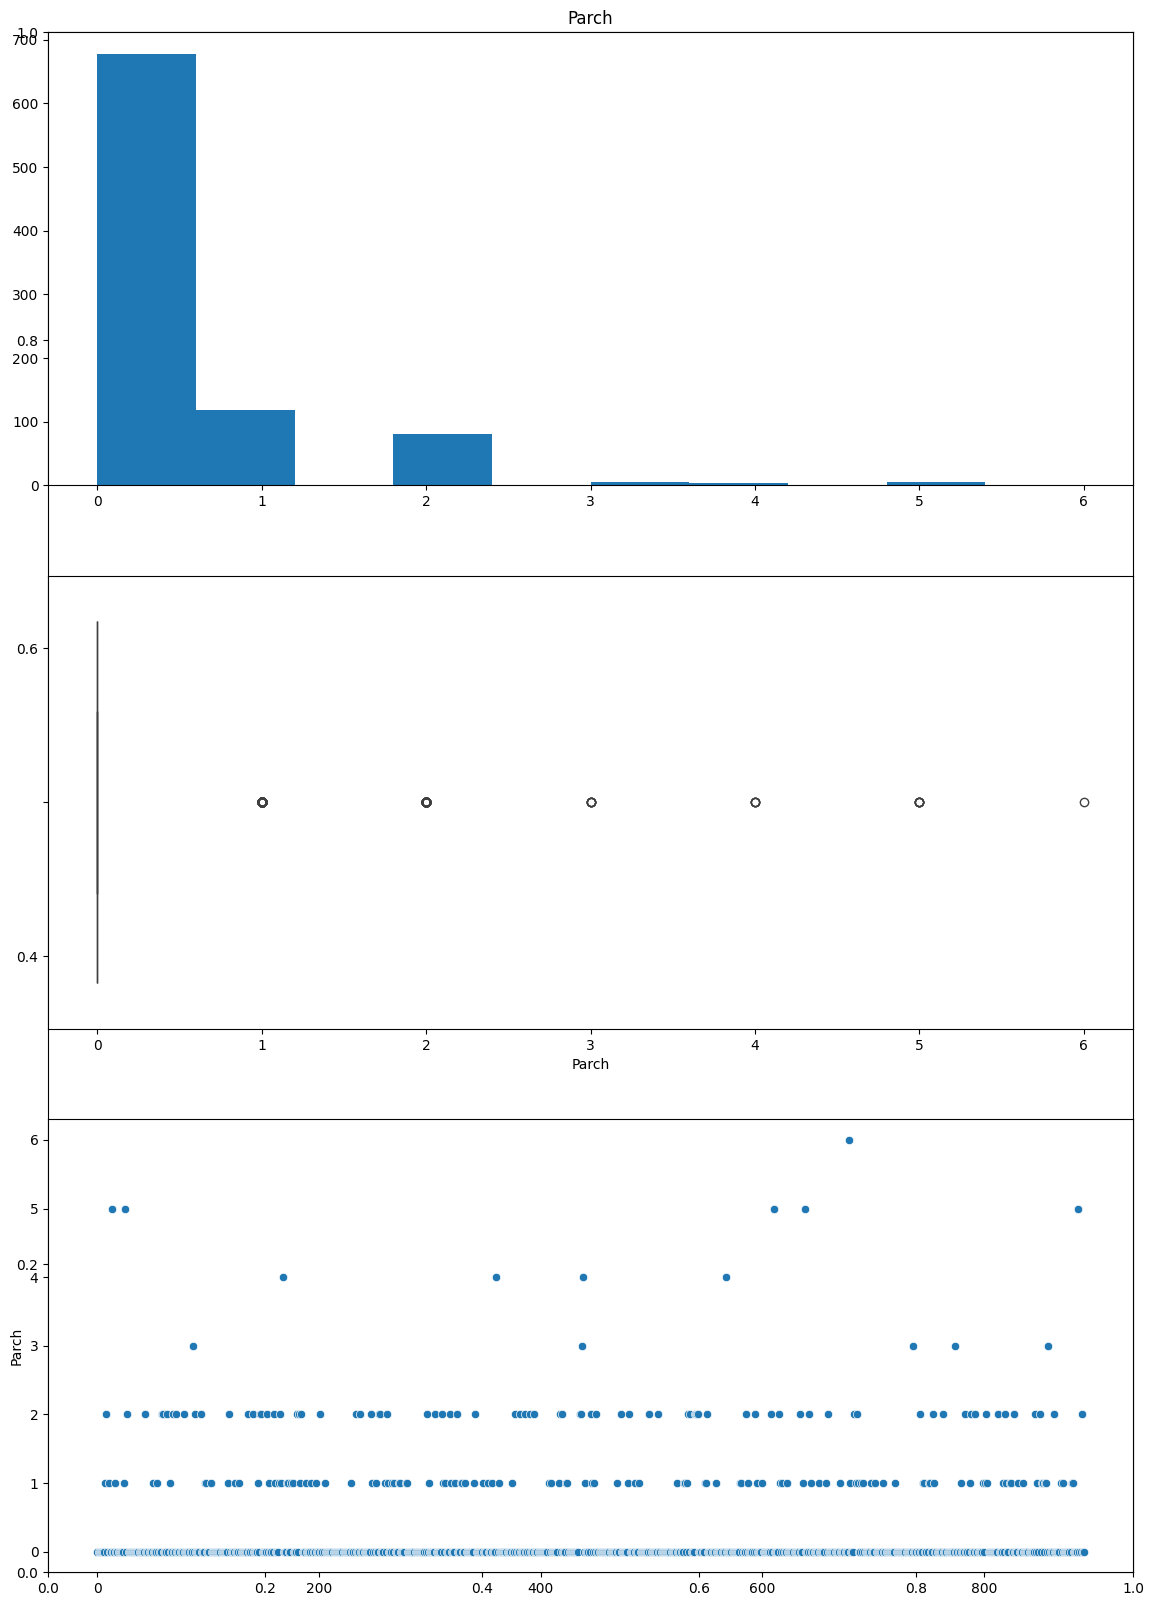

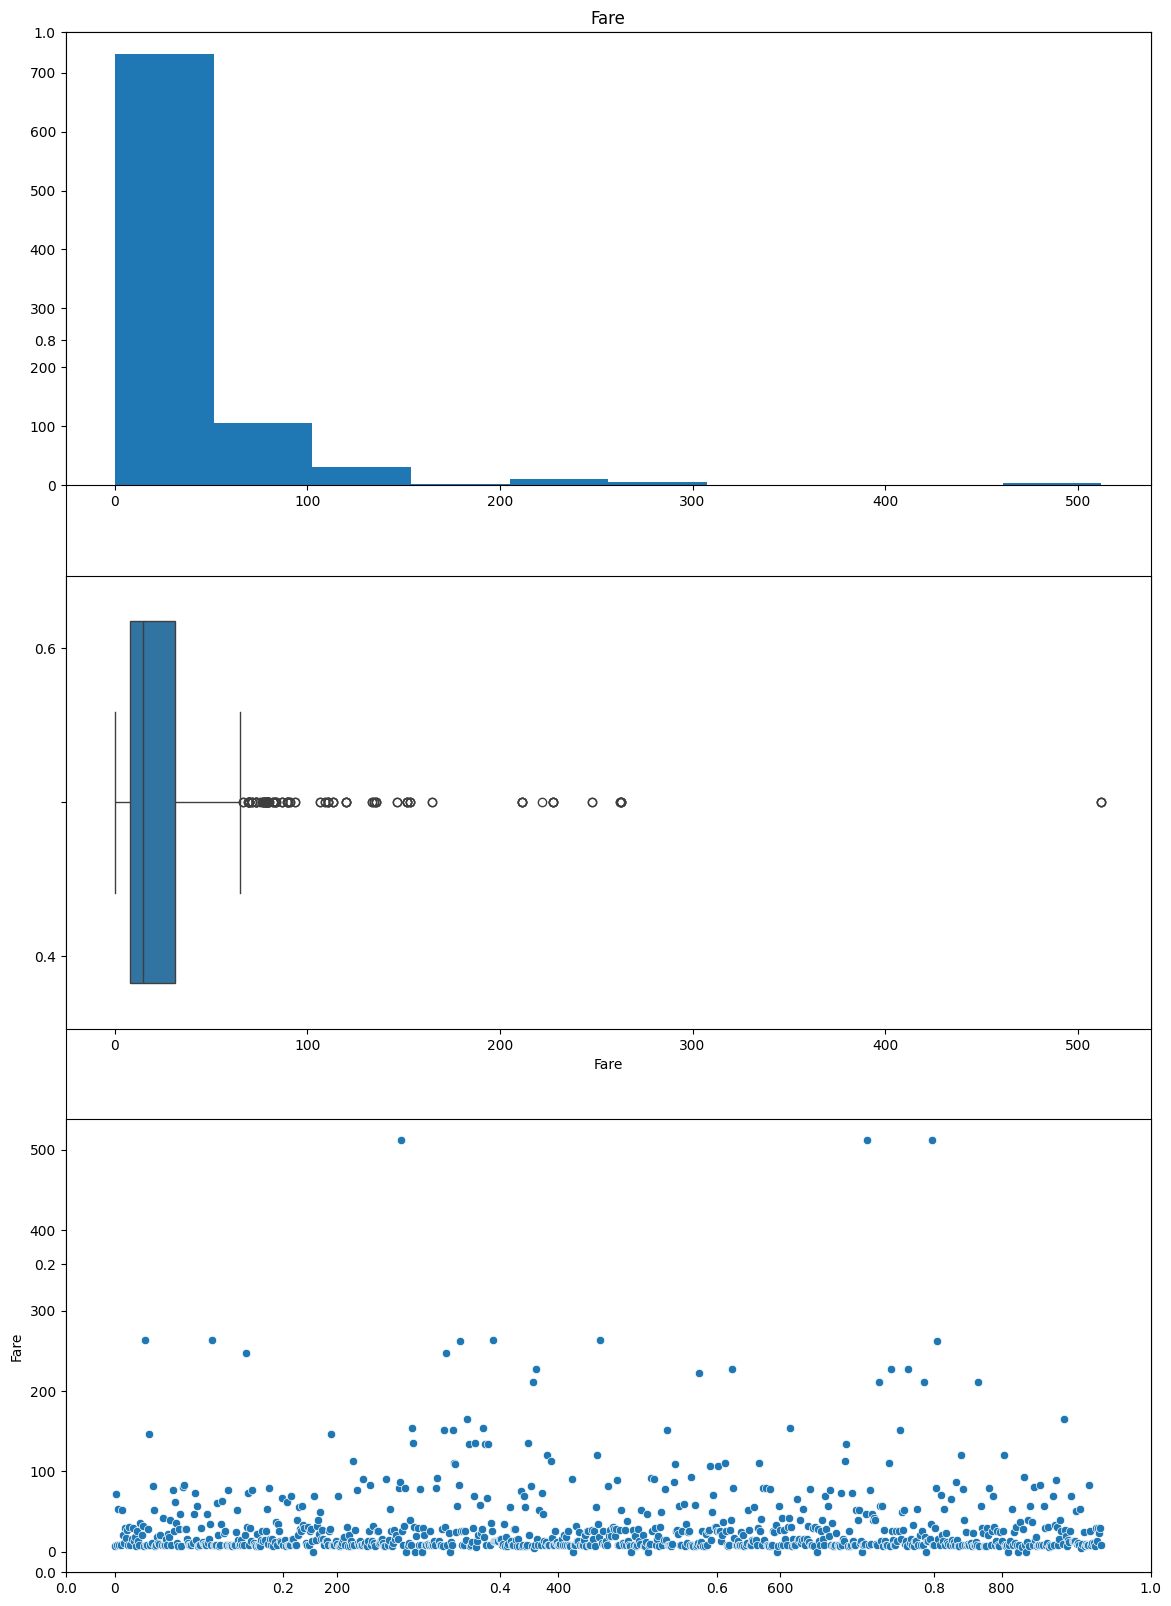

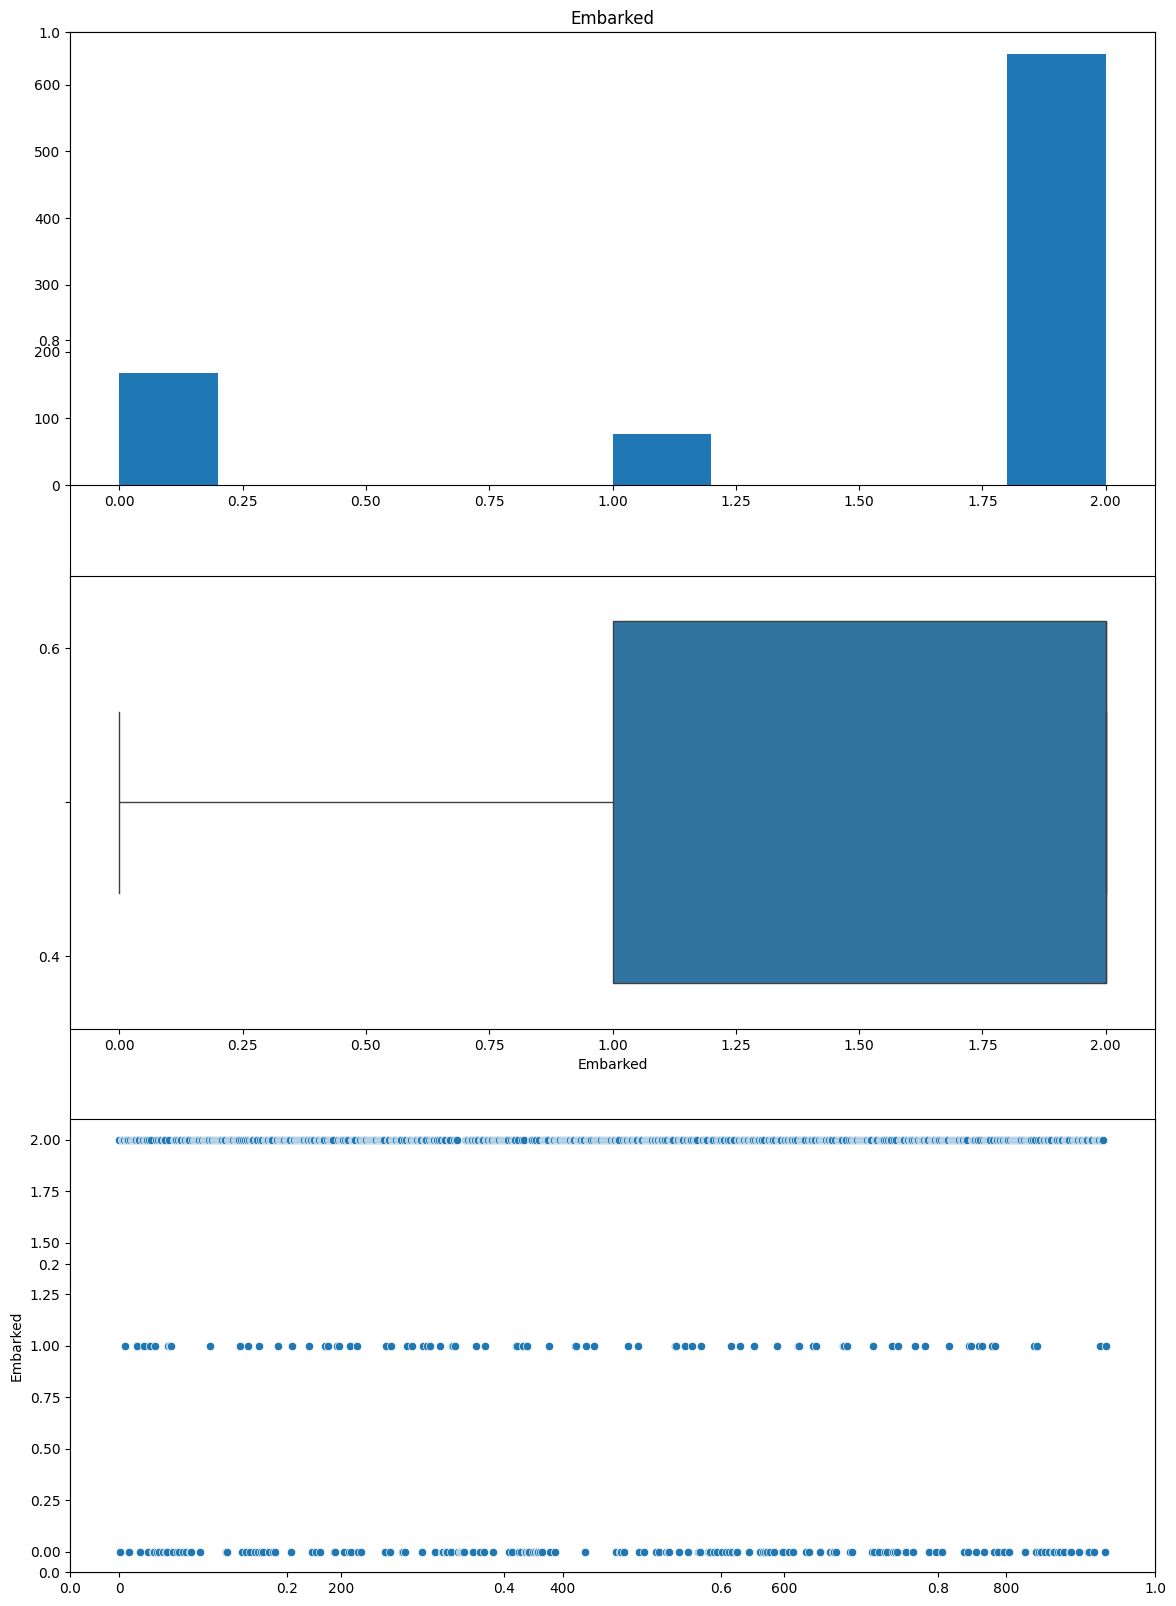

In [29]:
import warnings
warnings.filterwarnings("ignore")

for i in df:
    vis_outliers(df, i)

# Building Model

In [30]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### -Trying KNN

In [128]:
# Creating model KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()

In [129]:
# Normalizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [132]:
# Using Pipeline to automatically normalize new data for prediction.
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', scaler), ('knn', model_knn)])

In [156]:
# As I want to check which K-value is better from 1 to 30, I use GridSearchCV.
from sklearn.model_selection import GridSearchCV
full_model = GridSearchCV(pipe, param_grid = {'knn__n_neighbors':list(range(3,30,2))}, cv = 3, verbose = 2, scoring = 'accuracy') 

In [157]:
full_model.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END .................................knn__n_neighbors=3; total time=   0.1s
[CV] END .................................knn__n_neighbors=3; total time=   0.0s
[CV] END .................................knn__n_neighbors=3; total time=   0.0s
[CV] END .................................knn__n_neighbors=5; total time=   0.0s
[CV] END .................................knn__n_neighbors=5; total time=   0.0s
[CV] END .................................knn__n_neighbors=5; total time=   0.0s
[CV] END .................................knn__n_neighbors=7; total time=   0.0s
[CV] END .................................knn__n_neighbors=7; total time=   0.0s
[CV] END .................................knn__n_neighbors=7; total time=   0.0s
[CV] END .................................knn__n_neighbors=9; total time=   0.0s
[CV] END .................................knn__n_neighbors=9; total time=   0.0s
[CV] END .................................knn__n

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19,
                                              21, 23, 25, 27, 29]},
             scoring='accuracy', verbose=2)

In [158]:
y_pred = full_model.predict(X_test)

In [159]:
full_model.best_score_

0.8132231795671855

In [160]:
full_model.best_params_

{'knn__n_neighbors': 11}

In [161]:
# This returns not only best, but all parameters from GridSearchCV
full_model.cv_results_

{'mean_fit_time': array([0.02242327, 0.01205587, 0.01854579, 0.01808476, 0.01565123,
        0.01241   , 0.01920938, 0.01563676, 0.01739105, 0.01608721,
        0.01769964, 0.01456277, 0.02205594, 0.03506049]),
 'std_fit_time': array([5.00384126e-03, 7.14785477e-03, 2.70580635e-03, 3.47947524e-03,
        1.28141207e-05, 4.15500056e-03, 5.08780923e-03, 1.61355350e-05,
        1.65978757e-03, 6.54006726e-04, 2.90937876e-03, 4.40466085e-03,
        6.53362127e-03, 4.94094156e-03]),
 'mean_score_time': array([0.09087483, 0.07146724, 0.06684009, 0.07605418, 0.06811706,
        0.07310041, 0.06611609, 0.07422193, 0.06888127, 0.0572327 ,
        0.07409366, 0.09503778, 0.07160997, 0.1360321 ]),
 'std_score_time': array([0.02484616, 0.01787203, 0.01664386, 0.00622296, 0.00851958,
        0.01495466, 0.01029489, 0.0037195 , 0.00749092, 0.00471386,
        0.00709569, 0.00899468, 0.00934715, 0.02175325]),
 'param_knn__n_neighbors': masked_array(data=[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 

### -Trying SVC

In [32]:
# Creating model SVC
from sklearn.svm import SVC
model_svc= SVC()

In [33]:
# Normalizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
# Using Pipeline to automatically normalize new data for prediction.
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", scaler), ("model", model_svc)])

In [35]:
# Use GreadSearchCV for getting best parameters for SVC model
from sklearn.model_selection import GridSearchCV
full_model = GridSearchCV(pipe,
                          param_grid = {'model__C':[0.001, 0.01, 0.1, 1, 10, 100],  
                                        'model__gamma':[0.001, 0.01, 0.1, 1, 10], 
                                        'model__degree':[1, 2, 3, 4, 5, 6],
                                        'model__kernel':['linear', 'rbf', 'poly']},
                          cv = 5,
                          verbose = 2,
                          scoring = 'accuracy') 
# The hyperparameters C, gamma, kernel, degree I wrote as model__C, model__gamma etc., because in pipeline I gave name "model" to  model_svc.

# for following fitting I used hyperparameters without poly and degree, with them fitting going very harmful. Following fit info is not
# according the code below.

In [36]:
full_model.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END model__C=0.001, model__gamma=0.001, model__kernel=linear; total time=   0.0s
[CV] END model__C=0.001, model__gamma=0.001, model__kernel=linear; total time=   0.0s
[CV] END model__C=0.001, model__gamma=0.001, model__kernel=linear; total time=   0.0s
[CV] END model__C=0.001, model__gamma=0.001, model__kernel=linear; total time=   0.0s
[CV] END model__C=0.001, model__gamma=0.001, model__kernel=linear; total time=   0.0s
[CV] END model__C=0.001, model__gamma=0.001, model__kernel=rbf; total time=   0.0s
[CV] END model__C=0.001, model__gamma=0.001, model__kernel=rbf; total time=   0.0s
[CV] END model__C=0.001, model__gamma=0.001, model__kernel=rbf; total time=   0.0s
[CV] END model__C=0.001, model__gamma=0.001, model__kernel=rbf; total time=   0.0s
[CV] END model__C=0.001, model__gamma=0.001, model__kernel=rbf; total time=   0.0s
[CV] END model__C=0.001, model__gamma=0.01, model__kernel=linear; total time=   0.0s
[CV] END

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'model__gamma': [0.001, 0.01, 0.1, 1, 10],
                         'model__kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [37]:
y_pred = full_model.predict(X_test)

In [38]:
full_model.best_params_

{'model__C': 1, 'model__gamma': 0.1, 'model__kernel': 'rbf'}

In [39]:
full_model.best_score_

0.8257756328178862

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

